<a href="https://colab.research.google.com/github/Srinivas-Bhamidipati/My_DataScience_Portfolio/blob/main/Vehicle_Emission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("Fuel_Consumption.csv")
df.head()

Saving Fuel_Consumption.csv to Fuel_Consumption.csv


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


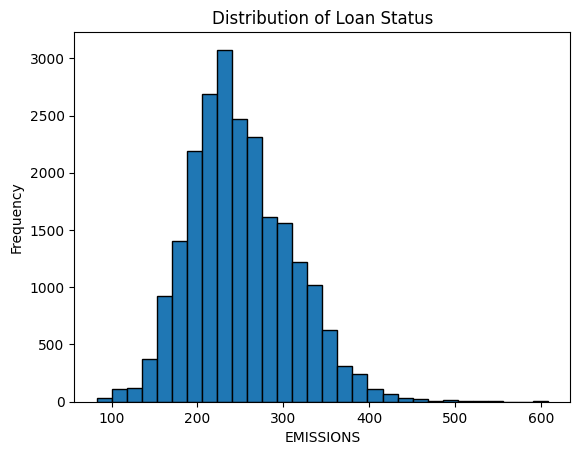

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['EMISSIONS'],bins=30,edgecolor='k')
plt.title('Distribution of Loan Status')
plt.xlabel('EMISSIONS')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['MAKE'].groupby(df['MAKE']).agg('count')

,MAKE
MAKE,
ACURA,197
ALFA ROMEO,8
ASTON MARTIN,80
AUDI,609
Acura,50
...,...
Toyota,242
VOLKSWAGEN,606
VOLVO,446


In [ ]:
df.shape

(22556, 13)

In [ ]:
df['MAKE'] = df['MAKE'].str.lower()

In [ ]:
df['MAKE'].groupby(df['MAKE']).agg('count')

,MAKE
MAKE,
acura,247
alfa romeo,42
aston martin,106
audi,805
bentley,118
bmw,1490
bugatti,12
buick,273
cadillac,434


In [ ]:
df.shape

(22556, 13)

In [ ]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [ ]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,acura,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,acura,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,acura,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,acura,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,acura,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [ ]:
df.isnull().sum()

,0
YEAR,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
HWY (L/100 km),0


In [ ]:
df.dtypes(object,inplace=True)

TypeError: 'Series' object is not callable

In [ ]:
# Display data types of each column
print(df.dtypes)

# Identify categorical columns (typically object dtype)
categorical_cols = df.select_dtypes(include='object').columns

print("\nCategorical variables:")
print(categorical_cols)

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

Categorical variables:
Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'], dtype='object')


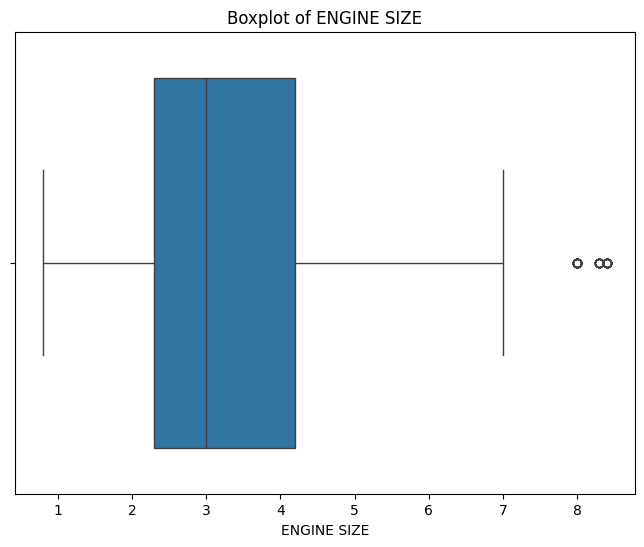

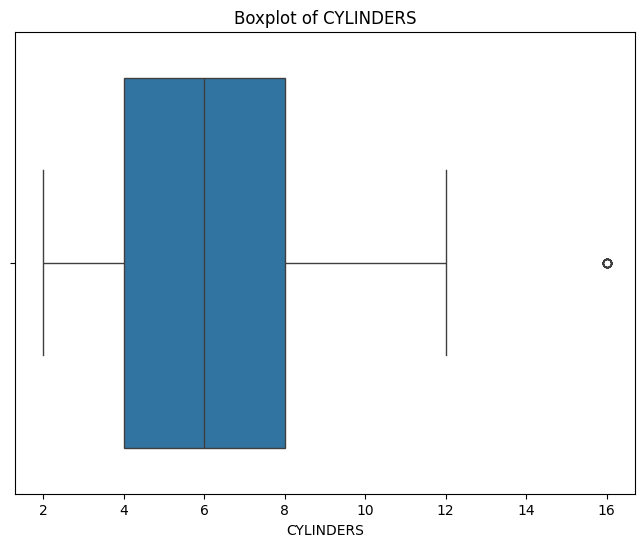

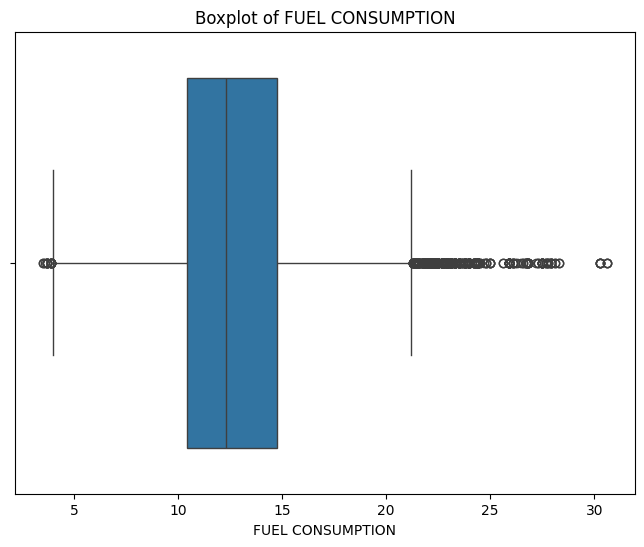

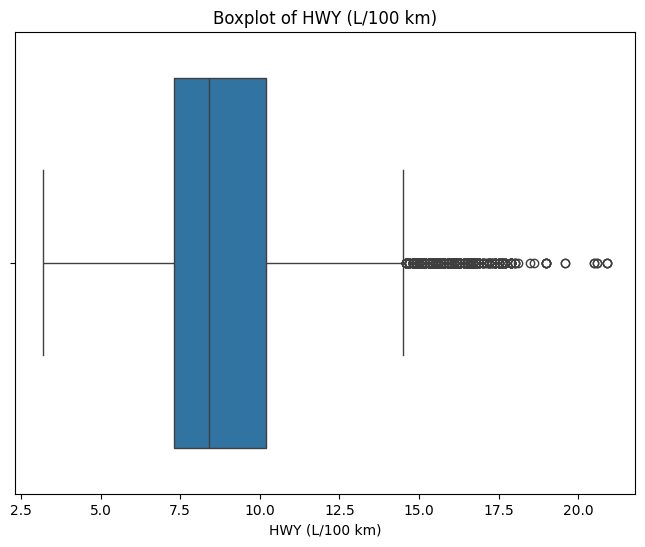

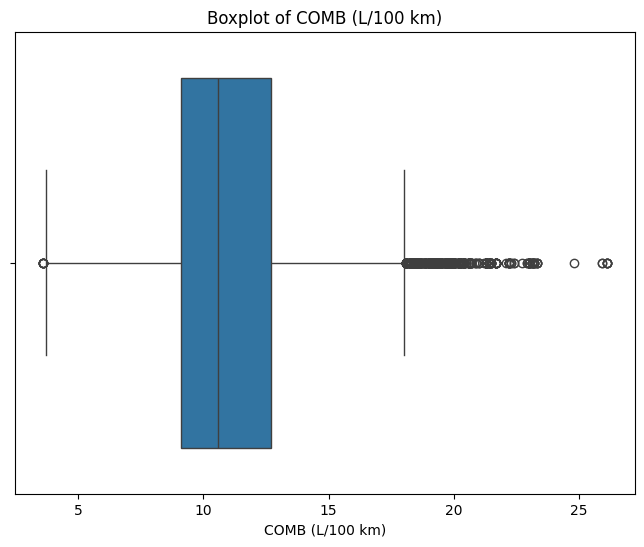

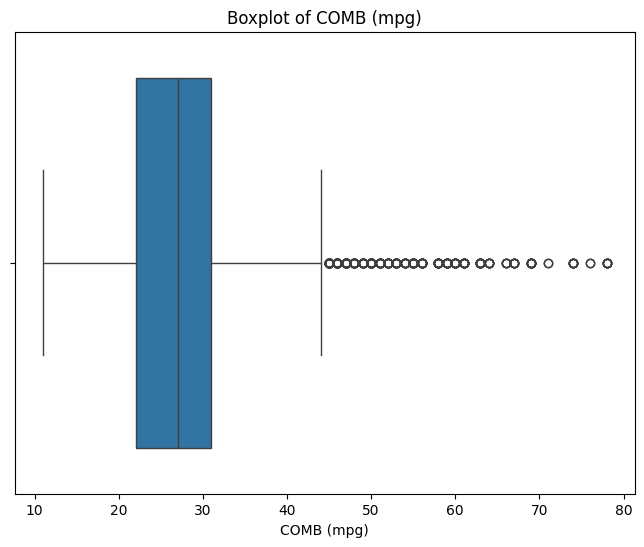

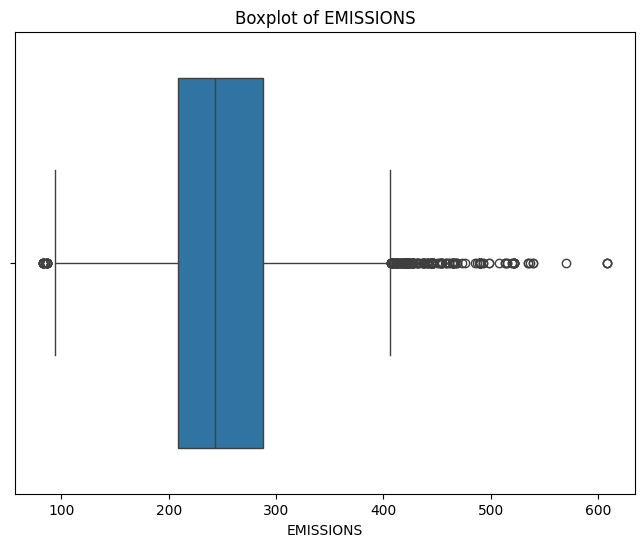

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols= ['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','HWY (L/100 km)','COMB (L/100 km)','COMB (mpg)','EMISSIONS']

for col in num_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()


In [ ]:
df['FUEL_CONSUMPTION_LOG']=np.log1p(df['FUEL CONSUMPTION'])
df['COMB (L/100 km)_log']=np.log1p(df['COMB (L/100 km)'])
df['EMISSIONS_log']=np.log1p(df['EMISSIONS'])
df['COMB (mpg)_log']=np.log1p(df['COMB (mpg)'])
df['HWY (L/100 km)_log']=np.log1p(df['HWY (L/100 km)'])

df[['COMB (L/100 km)_log','EMISSIONS_log','COMB (mpg)_log','HWY (L/100 km)_log','FUEL_CONSUMPTION_LOG']].head()

,COMB (L/100 km)_log,EMISSIONS_log,COMB (mpg)_log,HWY (L/100 km)_log,FUEL_CONSUMPTION_LOG
0,2.208274,5.231109,3.583519,2.041220,2.322388
1,2.151762,5.170484,3.637586,2.014903,2.251292
2,2.397895,5.442418,3.367296,2.128232,2.580217
3,2.525729,5.579730,3.258097,2.322388,2.667228
4,2.261763,5.293305,3.526361,2.079442,2.397895


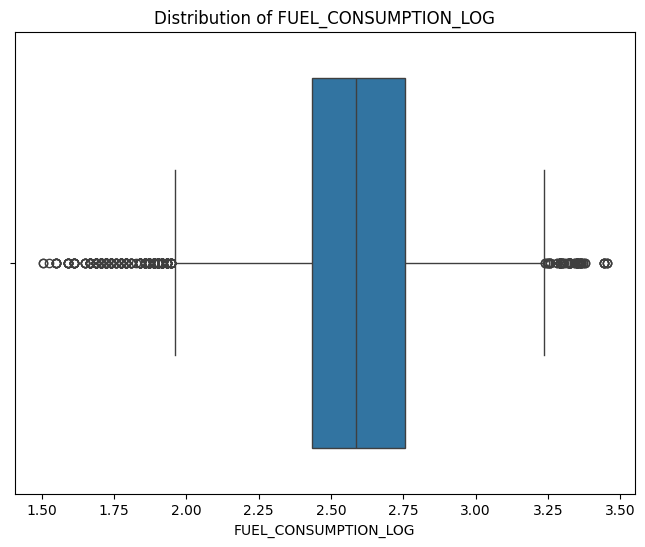

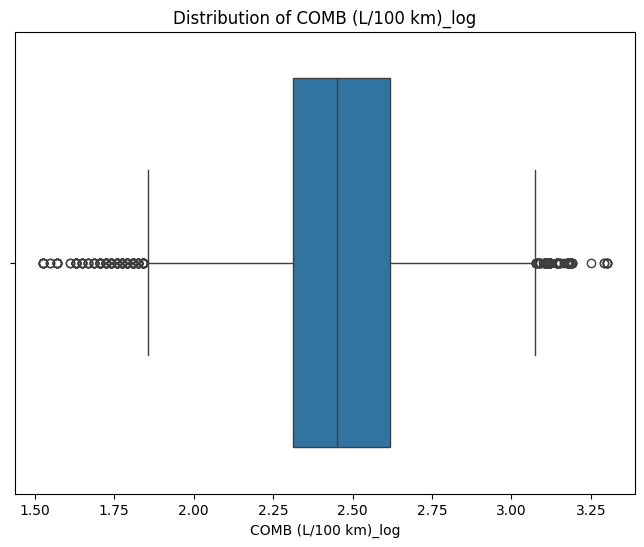

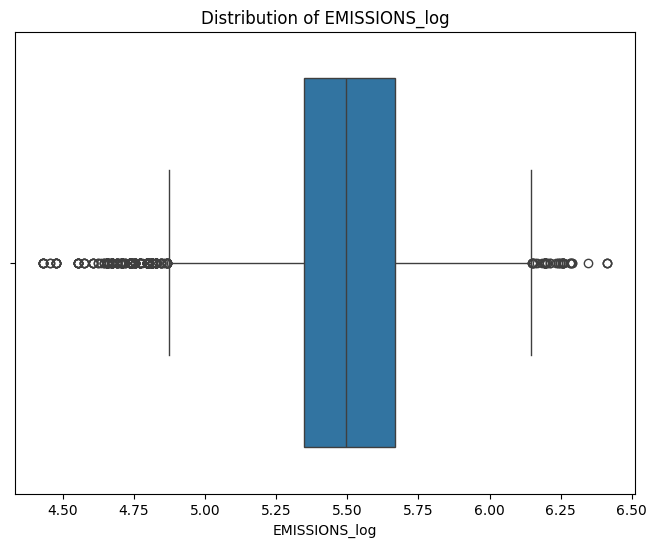

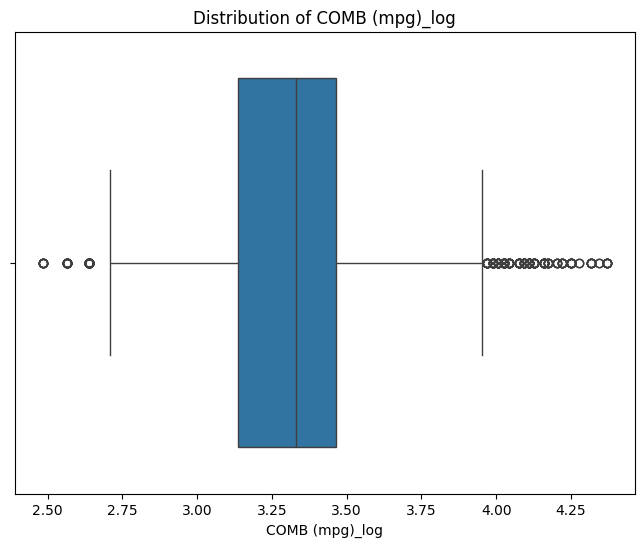

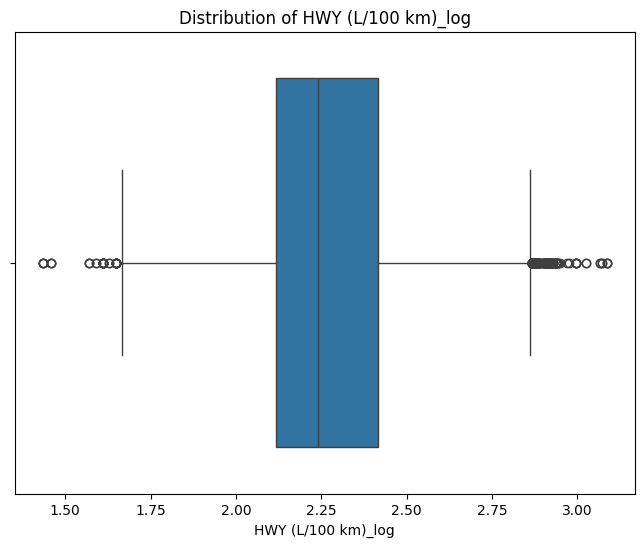

In [ ]:
num_cols2=['FUEL_CONSUMPTION_LOG','COMB (L/100 km)_log','EMISSIONS_log','COMB (mpg)_log','HWY (L/100 km)_log']

for col in num_cols2:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[col])
  plt.title(f"Distribution of {col}")
  plt.show()

In [ ]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,FUEL_CONSUMPTION_LOG,COMB (L/100 km)_log,EMISSIONS_log,COMB (mpg)_log,HWY (L/100 km)_log
0,2000,acura,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,2.322388,2.208274,5.231109,3.583519,2.041220
1,2000,acura,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,2.251292,2.151762,5.170484,3.637586,2.014903
2,2000,acura,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,2.580217,2.397895,5.442418,3.367296,2.128232
3,2000,acura,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,2.667228,2.525729,5.579730,3.258097,2.322388
4,2000,acura,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,2.397895,2.261763,5.293305,3.526361,2.079442


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Q1, Q3 and IQR
Q1 = df['FUEL CONSUMPTION'].quantile(0.25)
Q3 = df['FUEL CONSUMPTION'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Apply clipping
df['FUEL CONSUMPTION_clipped'] = df['FUEL CONSUMPTION'].clip(lower=lower_limit, upper=upper_limit)

# Quick check: show first 5 rows of original and clipped columns
df[['FUEL CONSUMPTION', 'FUEL CONSUMPTION_clipped']]

,FUEL CONSUMPTION,FUEL CONSUMPTION_clipped
0,9.2,9.2
1,8.5,8.5
2,12.2,12.2
3,13.4,13.4
4,10.0,10.0
...,...,...
22551,10.7,10.7
22552,10.5,10.5
22553,11.0,11.0
22554,11.5,11.5


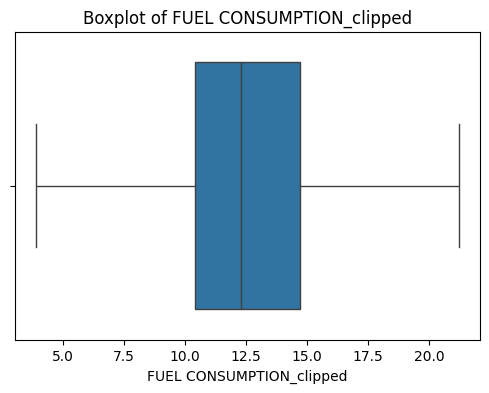

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['FUEL CONSUMPTION_clipped'])
plt.title("Boxplot of FUEL CONSUMPTION_clipped")
plt.show()

In [ ]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,FUEL_CONSUMPTION_LOG,COMB (L/100 km)_log,EMISSIONS_log,COMB (mpg)_log,HWY (L/100 km)_log,FUEL CONSUMPTION_clipped
0,2000,acura,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,2.322388,2.208274,5.231109,3.583519,2.041220,9.2
1,2000,acura,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,2.251292,2.151762,5.170484,3.637586,2.014903,8.5
2,2000,acura,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,2.580217,2.397895,5.442418,3.367296,2.128232,12.2
3,2000,acura,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,2.667228,2.525729,5.579730,3.258097,2.322388,13.4
4,2000,acura,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,2.397895,2.261763,5.293305,3.526361,2.079442,10.0


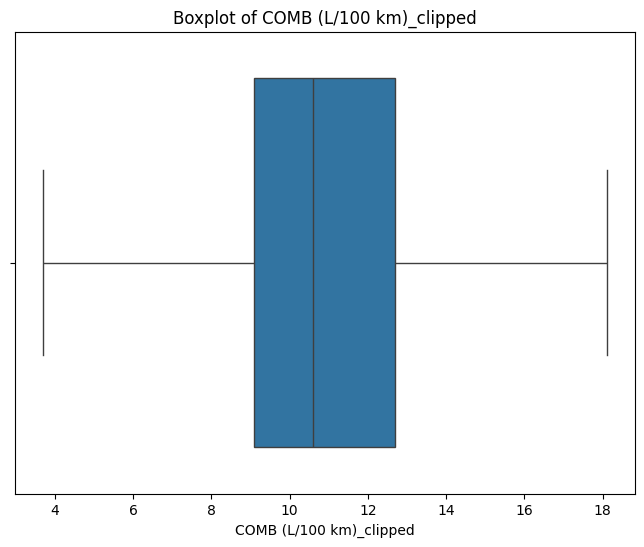

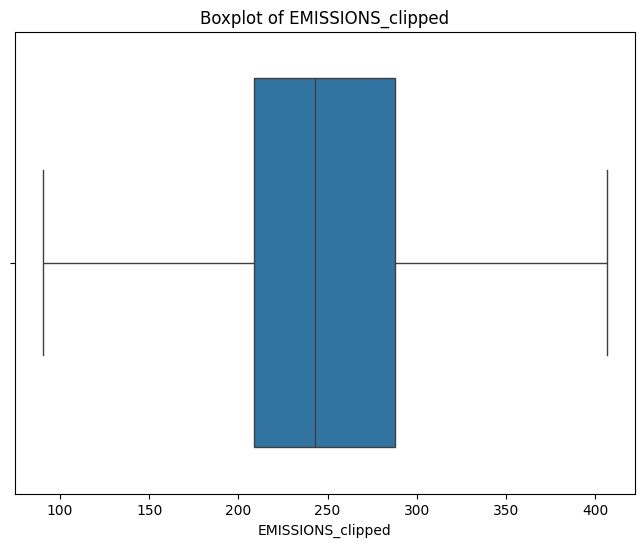

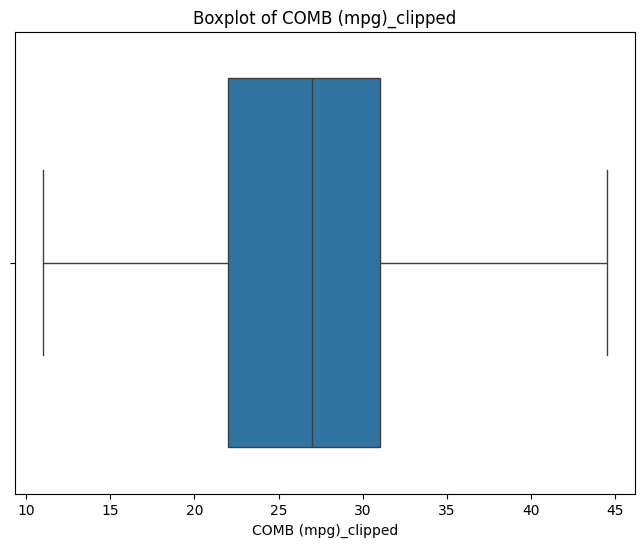

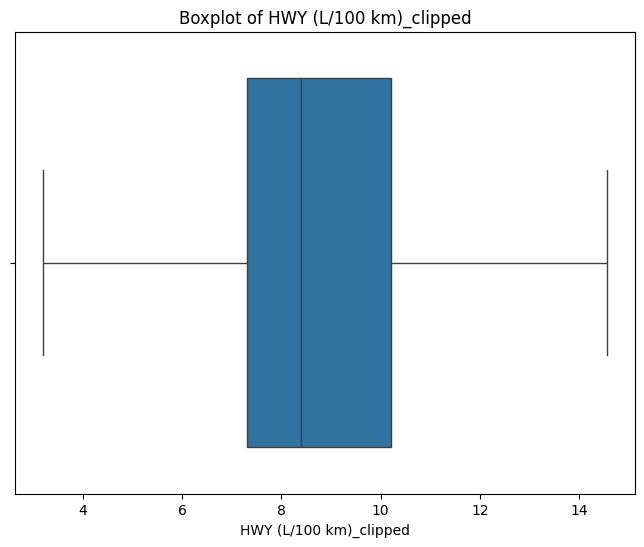

In [ ]:
num_cols_outliers = ['COMB (L/100 km)', 'EMISSIONS', 'COMB (mpg)', 'HWY (L/100 km)']

for col in num_cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[f'{col}_clipped'] = df[col].clip(lower=lower_limit, upper=upper_limit)

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[f'{col}_clipped'])
    plt.title(f"Boxplot of {col}_clipped")
    plt.show()

In [ ]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),...,FUEL_CONSUMPTION_LOG,COMB (L/100 km)_log,EMISSIONS_log,COMB (mpg)_log,HWY (L/100 km)_log,FUEL CONSUMPTION_clipped,COMB (L/100 km)_clipped,EMISSIONS_clipped,COMB (mpg)_clipped,HWY (L/100 km)_clipped
0,2000,acura,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,...,2.322388,2.208274,5.231109,3.583519,2.041220,9.2,8.1,186.0,35.0,6.7
1,2000,acura,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,...,2.251292,2.151762,5.170484,3.637586,2.014903,8.5,7.6,175.0,37.0,6.5
2,2000,acura,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,...,2.580217,2.397895,5.442418,3.367296,2.128232,12.2,10.0,230.0,28.0,7.4
3,2000,acura,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,...,2.667228,2.525729,5.579730,3.258097,2.322388,13.4,11.5,264.0,25.0,9.2
4,2000,acura,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,...,2.397895,2.261763,5.293305,3.526361,2.079442,10.0,8.6,198.0,33.0,7.0


In [ ]:
from scipy.stats import f_oneway

categorical_cols = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']
target = 'EMISSIONS'

anova_results = {}

for col in categorical_cols:
    groups = [df[target][df[col] == category] for category in df[col].unique()]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[col] = {'F-statistic': f_statistic, 'P-value': p_value}

for col, result in anova_results.items():
    print(f"ANOVA F-test for {col} vs {target}:")
    print(f"  F-statistic: {result['F-statistic']:.4f}")
    print(f"  P-value: {result['P-value']:.4f}")
    print("-" * 30)

ANOVA F-test for MAKE vs EMISSIONS:
  F-statistic: 280.1923
  P-value: 0.0000
------------------------------
ANOVA F-test for MODEL vs EMISSIONS:
  F-statistic: 58.2987
  P-value: 0.0000
------------------------------
ANOVA F-test for VEHICLE CLASS vs EMISSIONS:
  F-statistic: 364.9249
  P-value: 0.0000
------------------------------
ANOVA F-test for TRANSMISSION vs EMISSIONS:
  F-statistic: 177.7937
  P-value: 0.0000
------------------------------
ANOVA F-test for FUEL vs EMISSIONS:
  F-statistic: 210.8037
  P-value: 0.0000
------------------------------


In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'EMISSIONS' is our target variable
X = df.drop('EMISSIONS', axis=1)
y = df['EMISSIONS']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (18044, 22)
Testing set shape: (4512, 22)


In [ ]:
import category_encoders as ce

# Define the categorical columns for One-Hot Encoding
one_hot_cols = ['VEHICLE CLASS', 'TRANSMISSION', 'FUEL']

# Apply One-Hot Encoding to the training and testing sets
encoder_one_hot = ce.OneHotEncoder(cols=one_hot_cols, handle_unknown='ignore', use_cat_names=True)
X_train_encoded_one_hot = encoder_one_hot.fit_transform(X_train)
X_test_encoded_one_hot = encoder_one_hot.transform(X_test)

# Define the categorical column for Target Encoding
target_encode_col = 'MAKE'

# Apply Target Encoding to the training and testing sets
encoder_target = ce.TargetEncoder(cols=[target_encode_col])

# Fit the encoder ONLY on the training data
X_train_encoded_target = encoder_target.fit_transform(X_train_encoded_one_hot, y_train)

# Transform the testing data using the fitted encoder
X_test_encoded = encoder_target.transform(X_test_encoded_one_hot)

# Display the first few rows of the encoded training and testing sets
print("Encoded Training set shape:", X_train_encoded_target.shape)
print("Encoded Testing set shape:", X_test_encoded.shape)

display(X_train_encoded_target.head())
display(X_test_encoded.head())

Encoded Training set shape: (18044, 86)
Encoded Testing set shape: (4512, 86)


,YEAR,MAKE,MODEL,VEHICLE CLASS_SUBCOMPACT,VEHICLE CLASS_VAN - CARGO,VEHICLE CLASS_Mid-size,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_Compact,VEHICLE CLASS_PICKUP TRUCK - STANDARD,VEHICLE CLASS_SUV: Standard,...,FUEL_CONSUMPTION_LOG,COMB (L/100 km)_log,EMISSIONS_log,COMB (mpg)_log,HWY (L/100 km)_log,FUEL CONSUMPTION_clipped,COMB (L/100 km)_clipped,EMISSIONS_clipped,COMB (mpg)_clipped,HWY (L/100 km)_clipped
2777,2003,217.569307,CAMRY SOLARA CONVERTIBLE,1,0,0,0,0,0,0,...,2.602690,2.459589,5.509388,3.295837,2.240710,12.5,10.7,246.0,26.0,8.4
8081,2009,269.064612,EXPRESS CARGO CONV AWD,0,1,0,0,0,0,0,...,2.862201,2.747271,5.820083,2.995732,2.580217,16.5,14.6,336.0,19.0,12.2
553,2000,217.569307,CELICA,1,0,0,0,0,0,0,...,2.272126,2.174752,5.192957,3.610918,2.028148,8.7,7.8,179.0,36.0,6.6
20711,2021,246.411402,S5 Sportback quattro,0,0,1,0,0,0,0,...,2.525729,2.406945,5.472271,3.367296,2.251292,11.5,10.1,237.0,28.0,8.5
15914,2016,203.419501,ELANTRA GT,0,0,0,1,0,0,0,...,2.379546,2.261763,5.313206,3.526361,2.091864,9.8,8.6,202.0,33.0,7.1


,YEAR,MAKE,MODEL,VEHICLE CLASS_SUBCOMPACT,VEHICLE CLASS_VAN - CARGO,VEHICLE CLASS_Mid-size,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_Compact,VEHICLE CLASS_PICKUP TRUCK - STANDARD,VEHICLE CLASS_SUV: Standard,...,FUEL_CONSUMPTION_LOG,COMB (L/100 km)_log,EMISSIONS_log,COMB (mpg)_log,HWY (L/100 km)_log,FUEL CONSUMPTION_clipped,COMB (L/100 km)_clipped,EMISSIONS_clipped,COMB (mpg)_clipped,HWY (L/100 km)_clipped
15598,2016,269.064612,CRUZE,0,0,0,0,0,0,0,...,2.174752,2.054124,5.075174,3.761200,1.887070,7.8,6.8,159.0,42.0,5.6
18784,2019,265.832353,CTS-V,0,0,1,0,0,0,0,...,2.895912,2.727853,5.823046,3.044522,2.484907,17.1,14.3,337.0,20.0,11.0
15516,2016,250.096499,M6 CABRIOLET,1,0,0,0,0,0,0,...,2.906901,2.753661,5.843544,2.995732,2.525729,17.3,14.7,344.0,19.0,11.5
18532,2018,217.349282,Crosstrek AWD,0,0,0,0,0,0,0,...,2.282382,2.208274,5.241747,3.583519,2.104134,8.8,8.1,188.0,35.0,7.2
8803,2009,234.464078,9-3 SPORTCOMBI TURBO,0,0,0,0,0,0,0,...,2.694627,2.509599,5.564520,3.258097,2.230014,13.8,11.3,260.0,25.0,8.3


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target and any original unclipped columns if they still exist)
# We'll scale the clipped numerical columns and the 'YEAR' column if it's treated as numerical
# Also include the target encoded 'MAKE' column as it's now numerical

numerical_cols_to_scale = [ 'ENGINE SIZE', 'CYLINDERS',
                           'FUEL CONSUMPTION_clipped', 'COMB (L/100 km)_clipped',
                           'EMISSIONS_clipped', 'COMB (mpg)_clipped',
                           'HWY (L/100 km)_clipped', 'MAKE'] # Include the target encoded 'MAKE'

# Ensure only columns present in the encoded dataframes are selected
numerical_cols_to_scale_train = [col for col in numerical_cols_to_scale if col in X_train_encoded_target.columns]
numerical_cols_to_scale_test = [col for col in numerical_cols_to_scale if col in X_test_encoded.columns]


# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data (numerical columns)
scaler.fit(X_train_encoded_target[numerical_cols_to_scale_train])

# Transform the training and testing data (numerical columns)
X_train_scaled_numerical = scaler.transform(X_train_encoded_target[numerical_cols_to_scale_train])
X_test_scaled_numerical = scaler.transform(X_test_encoded[numerical_cols_to_scale_test])

# Convert scaled arrays back to DataFrames to easily combine with other features
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_to_scale_train, index=X_train_encoded_target.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_to_scale_test, index=X_test_encoded.index)

# Drop the original numerical columns from the encoded dataframes before combining with scaled ones
X_train_processed = X_train_encoded_target.drop(columns=numerical_cols_to_scale_train)
X_test_processed = X_test_encoded.drop(columns=numerical_cols_to_scale_test)


# Combine the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_processed, X_train_scaled_numerical_df], axis=1)
X_test_processed = pd.concat([X_test_processed, X_test_scaled_numerical_df], axis=1)


print("Processed Training set shape:", X_train_processed.shape)
print("Processed Testing set shape:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())

Processed Training set shape: (18044, 86)
Processed Testing set shape: (4512, 86)


,YEAR,MODEL,VEHICLE CLASS_SUBCOMPACT,VEHICLE CLASS_VAN - CARGO,VEHICLE CLASS_Mid-size,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_Compact,VEHICLE CLASS_PICKUP TRUCK - STANDARD,VEHICLE CLASS_SUV: Standard,VEHICLE CLASS_TWO-SEATER,...,COMB (mpg)_log,HWY (L/100 km)_log,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION_clipped,COMB (L/100 km)_clipped,EMISSIONS_clipped,COMB (mpg)_clipped,HWY (L/100 km)_clipped,MAKE
2777,2003,CAMRY SOLARA CONVERTIBLE,1,0,0,0,0,0,0,0,...,3.295837,2.240710,-0.264125,0.084020,-0.059809,-0.100829,-0.058680,-0.182287,-0.219808,-0.884641
8081,2009,EXPRESS CARGO CONV AWD,0,1,0,0,0,0,0,0,...,2.995732,2.580217,1.458057,1.185412,1.129907,1.296773,1.487044,-1.217970,1.529115,0.532768
553,2000,CELICA,1,0,0,0,0,0,0,0,...,3.610918,2.028148,-1.162655,-1.017371,-1.190039,-1.140071,-1.209386,1.297260,-1.048245,-0.884641
20711,2021,S5 Sportback quattro,0,0,1,0,0,0,0,0,...,3.367296,2.251292,-0.264125,0.084020,-0.357238,-0.315844,-0.213252,0.113623,-0.173784,-0.090762
15914,2016,ELANTRA GT,0,0,0,1,0,0,0,0,...,3.526361,2.091864,-1.012900,-1.017371,-0.862867,-0.853383,-0.814367,0.853396,-0.818124,-1.274114


,YEAR,MODEL,VEHICLE CLASS_SUBCOMPACT,VEHICLE CLASS_VAN - CARGO,VEHICLE CLASS_Mid-size,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_Compact,VEHICLE CLASS_PICKUP TRUCK - STANDARD,VEHICLE CLASS_SUV: Standard,VEHICLE CLASS_TWO-SEATER,...,COMB (mpg)_log,HWY (L/100 km)_log,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION_clipped,COMB (L/100 km)_clipped,EMISSIONS_clipped,COMB (mpg)_clipped,HWY (L/100 km)_clipped,MAKE
15598,2016,CRUZE,0,0,0,0,0,0,0,0,...,3.761200,1.887070,-1.462165,-1.017371,-1.457725,-1.498430,-1.552880,2.184989,-1.508488,0.532768
18784,2019,CTS-V,0,0,1,0,0,0,0,0,...,3.044522,2.484907,2.131954,1.185412,1.308364,1.189265,1.504219,-1.070015,0.976824,0.443800
15516,2016,M6 CABRIOLET,1,0,0,0,0,0,0,0,...,2.995732,2.525729,0.784159,1.185412,1.367850,1.332609,1.624442,-1.217970,1.206945,0.010670
18532,2018,Crosstrek AWD,0,0,0,0,0,0,0,0,...,3.583519,2.104134,-1.012900,-1.017371,-1.160296,-1.032563,-1.054813,1.149306,-0.772099,-0.890697
8803,2009,9-3 SPORTCOMBI TURBO,0,0,0,0,0,0,0,0,...,3.258097,2.230014,-0.413880,0.084020,0.326849,0.114187,0.181766,-0.330241,-0.265832,-0.419612


In [ ]:
from sklearn.linear_model import LinearRegression

# Drop the 'MODEL' column from the processed dataframes
X_train_processed = X_train_processed.drop('MODEL', axis=1)
X_test_processed = X_test_processed.drop('MODEL', axis=1)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the processed training data
model.fit(X_train_processed, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 1.0971
Mean Squared Error (MSE): 9.4119
Root Mean Squared Error (RMSE): 3.0679
R-squared (R²): 0.9973
